<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Raimundo Sandoval
- Nombre de alumno 2: Cristóbal Subiabre


### **Link de repositorio de GitHub:** `https://github.com/raisando/Laboratorio-MDS7202-`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
# Si usted está utilizando Colaboratory le puede ser útil este código para cargar los archivos.
import os
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/U. Chile/9no Semestre 2023/Laboratorio Programación Cientifica/Lab_10'
    path = '/content/drive/MyDrive/U/Laboratorio Programación Cientifica/Lab_10'
    os.chdir(path)
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

In [3]:
!pip install xgboost
!pip install ydata_profiling

Primero se crea un EDA con la libreria profile report, parar conocer las distribuciones y analizar que transformacion aplicar.

In [4]:
from ydata_profiling import ProfileReport

#profile = ProfileReport(df, title="EDA_lab_10")
#profile.to_file("EDA_lab_10.html")

In [5]:
#profile

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1999)

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

std_features = ['Age', 'BMI']
minmax_features = ['GenHlth', 'MentHlth', 'PhysHlth']

numeric_transformer = StandardScaler()
numeric_transformer2 = MinMaxScaler()

ct = ColumnTransformer(
    transformers=[
        ('std', numeric_transformer, std_features),
        ('minmax', numeric_transformer2, minmax_features)
    ],
    remainder='passthrough'
)

In [8]:
model_XGB = Pipeline(steps=[('preprocessor', ct),
                        ('classifier', XGBClassifier())])
model_XGB.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  ['Age', 'BMI']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['GenHlth', 'MentHlth',
                                                   'PhysHlth'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [9]:
from sklearn.metrics import classification_report

y_pred = model_XGB.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7125
         1.0       0.73      0.79      0.76      7014

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



A partir de los resultados obtenidos, se puede ver que el modelo es un clasificador aceptable se podria decir, con las metricas utilizadas se puede detectar el error más importante en este tipo de situaciones, el cual es el del falso negativo, dado a que puede llegar a ser muy peligroso para la salud diagnosticar a alguien sin una enfermedad cuando en realidad si la tiene, por ello, al utilizar las metricas anteriormente mostradas si se puede seleccionar el mejor modelo, ahora bien, no se puede saber que columna es más importante a simple vista.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

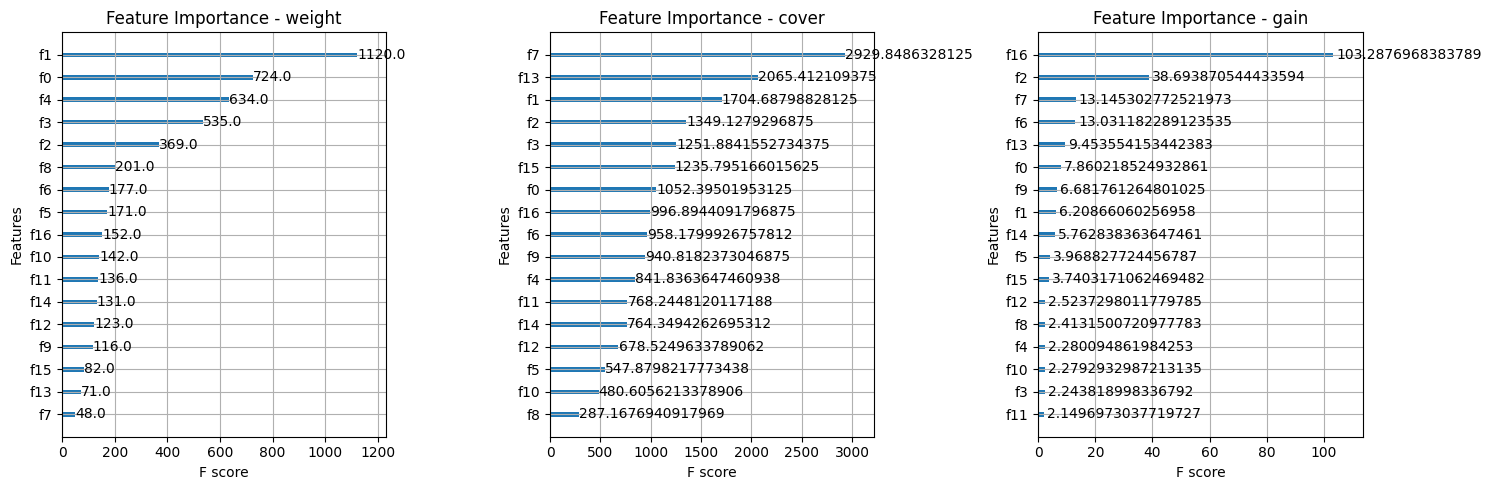

In [10]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Obtener el modelo entrenado
model_XGB_trained = model_XGB.named_steps['classifier']

# Obtener la importancia de las características
importance_type = ['weight', 'cover', 'gain']
fig, axes = plt.subplots(nrows=1, ncols=len(importance_type), figsize=(15, 5))

for i, imp_type in enumerate(importance_type):
    ax = axes[i]
    xgb.plot_importance(model_XGB_trained, ax=ax, importance_type=imp_type)
    ax.set_title(f'Feature Importance - {imp_type}')

plt.tight_layout()
plt.show()

**Respuesta** En primer lugar, los resultados no son tan compatibles entre ellos. Entre los tres entregan top 3 distintos y con importancias relativas tambien muy disparejas. Por ejemplo weight y cover ponene en extremos distintos la feature numero 7.

Aunque estas medidas proporcionan cierta información sobre la importancia relativa de las características, no ofrecen una interpretación completa y detallada del modelo. El hecho de que las características puedan interactuar de maneras complejas hacen que sea difícil obtener una interpretación precisa únicamente a partir de las importancias de características. Además, las importancias de características basadas en árboles pueden presentar la debilidad de sobrevalorar las características numéricas o aquellas con mayor cardinalidad. Esto se debe a que los árboles de decisión tienden a dividir los datos en base a características con mayor variabilidad o información única.

## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

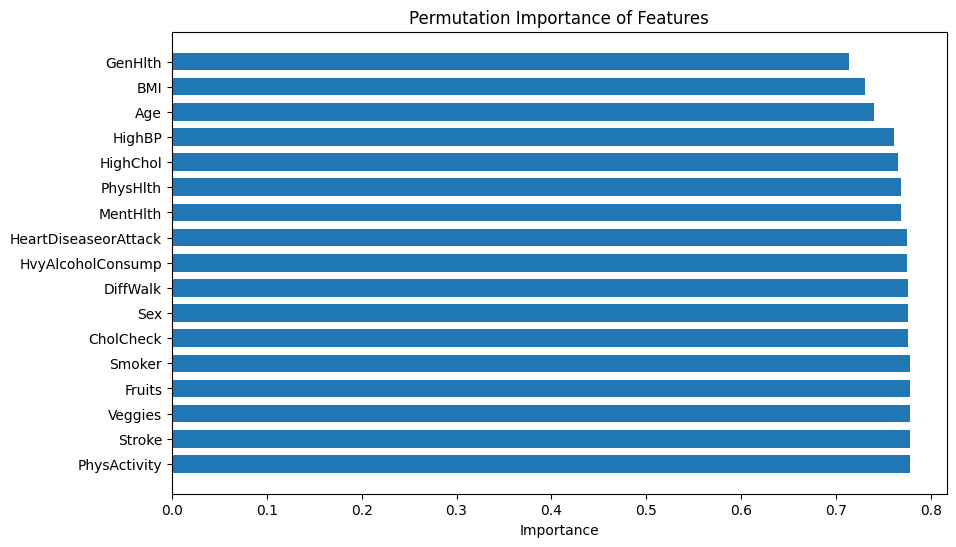

In [11]:
import numpy as np
from sklearn.metrics import accuracy_score

# Crear una función para calcular la importancia de las características mediante permutación
def permutation_importance(model, X, y, metric, n_repeats = 30, random_state = 1999):
    rng = np.random.RandomState(random_state)
    importances = {}

    for feature in X.columns:
        scores = []
        X_permuted = X.copy()

        for _ in range(n_repeats):
            permuted_values = rng.permutation(X[feature])
            X_permuted[feature] = permuted_values
            y_pred = model.predict(X_permuted)
            score = metric(y, y_pred)
            scores.append(score)

        importances[feature] = np.mean(scores)

    return importances
# Calcular la importancia de las características mediante permutación
importance = permutation_importance(model_XGB, X_train, y_train, metric = accuracy_score)

# Obtener los nombres de las características y sus importancias
feature_names = list(importance.keys())
feature_importances = list(importance.values())
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importances, height=0.7)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Importance')
plt.title('Permutation Importance of Features')
plt.show()


La propuesta realiza permutaciones sobre las features y les calcula el accuracy de prediccion, luego, estos acuracy se promedian y de tal modo aquellos que tienen un valor mayor quiere decir que aportan positivamente en aumentar el accuracy y por tanto tienen una mayor importancia para tener un mejor modelo.

Los primeros 5 features que tienen más importancia son:
- Veggies
- Stroke
- Fruits
- Smoker
- PhysActivity

Lo cual tiene mucho sentido, dado a que hacen referencia con aspectos de salud que tienen directa relacion con la probabilidad de padecer la enfermedad.

Aqui es más claro encontrar las features importantes.

Ventajas:
- Interpretabilidad, es más rapido y directo detectar las features más importantes.
- Es facil de comparar entre modelos.
- Para calcular las importancias toma en cuenta las interacciones entre variables.

Desventajas:
- Costo computacional, el proceso es lento.
- Muy susceptible a sobreajustes y sesgos del modelo.
- Para calcularlo se necesita accesso a la gold label.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)


Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [12]:
!pip install shap

In [13]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [14]:
# Calcular los SHAP values para el conjunto de datos de prueba
feature_names = X_test.columns
X_prepr = ct.transform(X_test)
X_new = pd.DataFrame(X_prepr)
X_new.columns = feature_names

In [15]:
import shap
clf = model_XGB_trained

explainer = shap.TreeExplainer(clf)
shap_values = explainer(X_new)



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [16]:
shap_values.values

array([[ 0.10690329, -0.39592606, -0.7223944 , ..., -0.06133403,
        -0.02836147,  0.5482215 ],
       [ 0.33862305,  0.46235785,  0.7367296 , ...,  0.16767761,
        -0.0133123 ,  0.34944114],
       [ 0.33008566,  0.18857849,  0.5028877 , ...,  0.24528219,
        -0.0073847 ,  0.4006774 ],
       ...,
       [-1.1209028 ,  0.08515411, -0.7217076 , ..., -0.07628241,
        -0.02744523, -0.44433215],
       [-1.1239095 , -0.21348836, -0.81563   , ..., -0.1143719 ,
        -0.03241701,  0.5081316 ],
       [-0.04434526, -0.29749224, -0.6343168 , ..., -0.04046462,
        -0.0244868 , -0.66742647]], dtype=float32)

**Respuesta** El valor de Shap para una característica se calcula considerando todas las combinaciones posibles de características y comparando las predicciones correspondientes. Es decir, cada shap value representa el "aporte" de esta feature a la clasificacion final, un shap value (de valor absoluto) alto, significa que tiene harto aporte para la clasificacion. Continuando esta idea, la positividad/negatividad significa de que manera contribuye a la clasificacion, si el shap value de una característica es positivo, significa que la presencia de esa característica contribuye positivamente al valor de la predicción. Por otro lado, si el valor de Shap es negativo, indica que la presencia de esa característica tiene un impacto negativo en la predicción

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

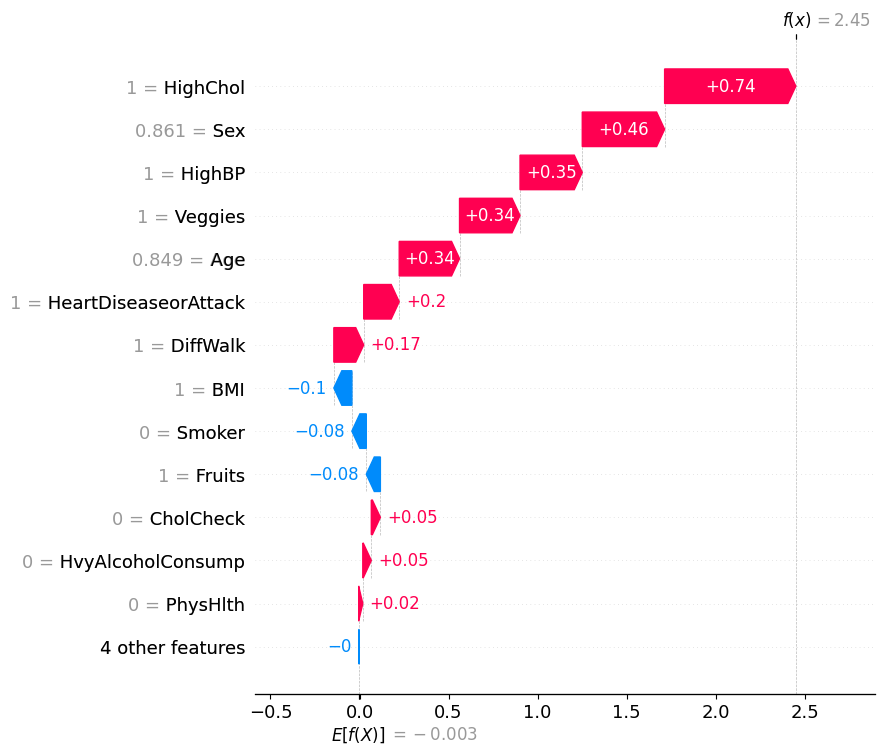

In [17]:
# Instancia 1
idx=1
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

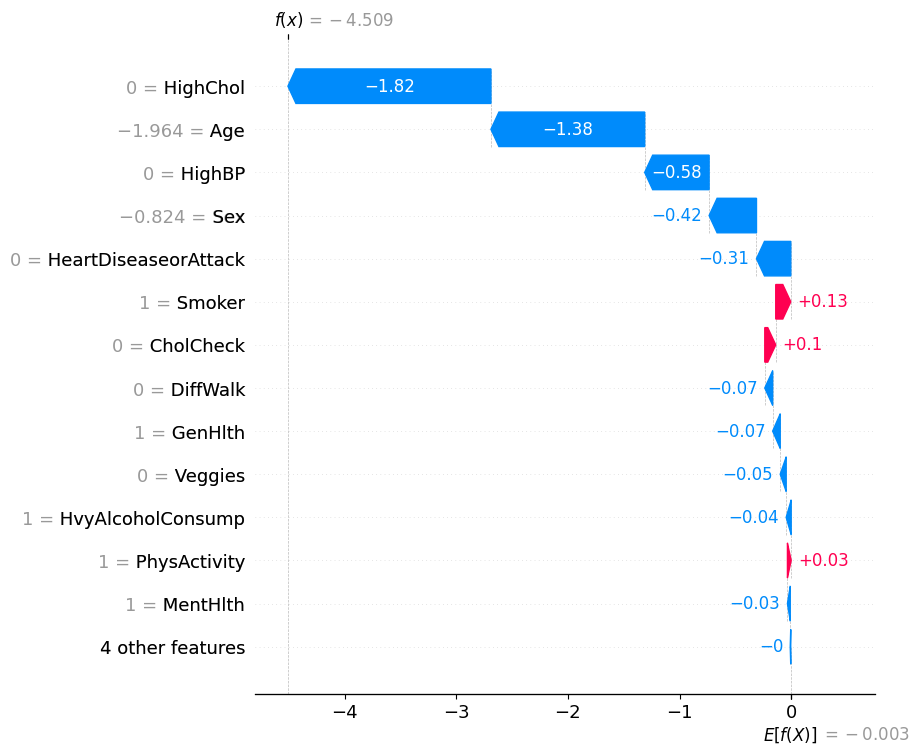

In [18]:
shap.initjs()
idx=9
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

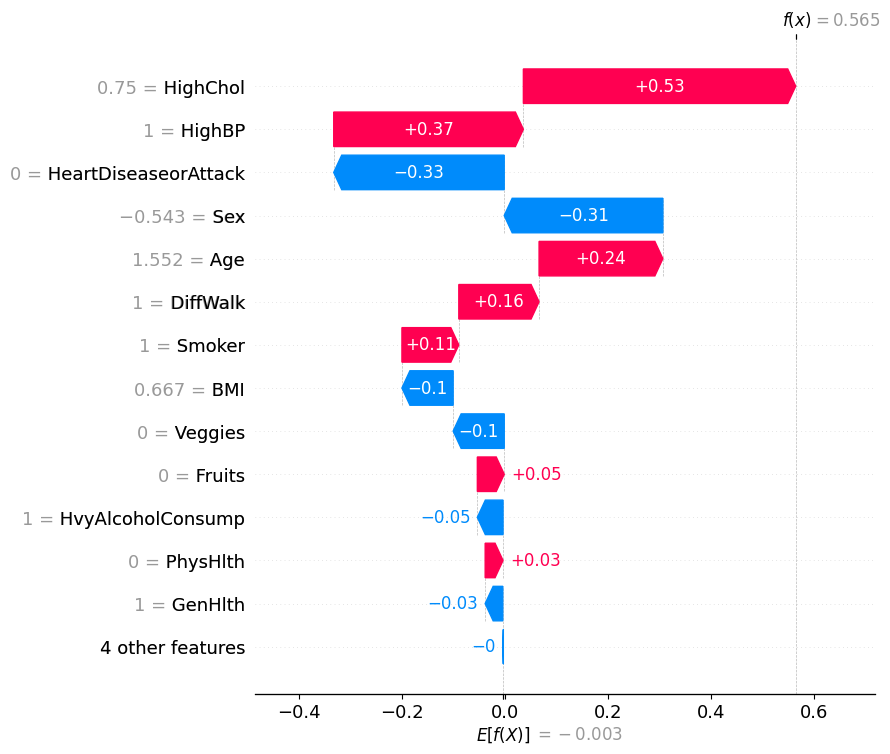

In [19]:
shap.initjs()
idx=150
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

**Respuesta** Varables que afectan positivamente la probabilidad de poseer diabetes son el colesterol alto, ser fumador, y presion alta, todas con una alta correlacion en combinacion con la edad y sexo. Negativamente afectan los mismo features pero con valores contrarios (no ser funador, ni tener el colestero alto, etc.).

Por otro lado, en general esas son las features que se repiten y tienen mas efecto pero en "direcciones" de la clasificacion. Por lo tanto lo podriamos considerar una especie de patron, y dado que los valores shap son altos, se puede extrapolar y argumentar que si se pueden generalizar estas conclusiones a todo el dataset.


### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


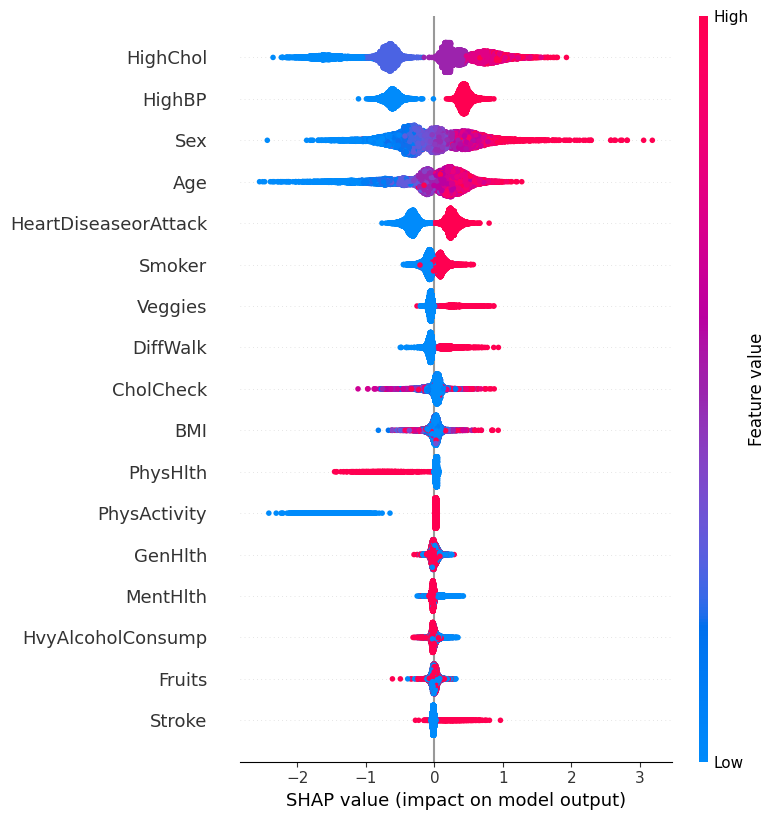

In [20]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, X_new, feature_names=feature_names)


**Respuesta** No existe tanta diferencia entre el nivel global y los calculos locales anteriores. Si se pueden visualizar otras features que tienen valores altos pero aportando a una clasificacion en particular, como la actividad fisica o la salud fisica.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

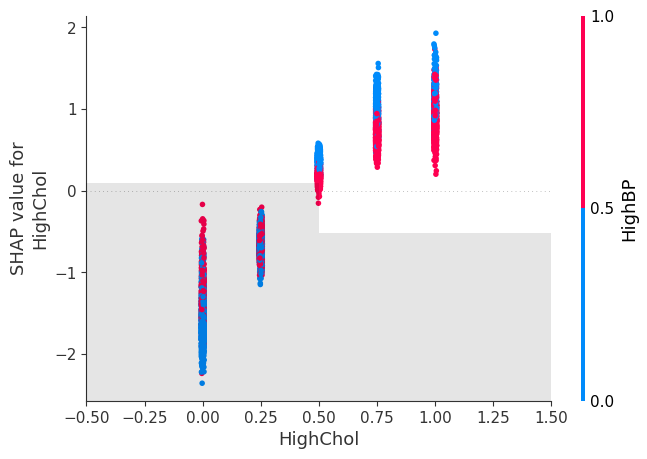

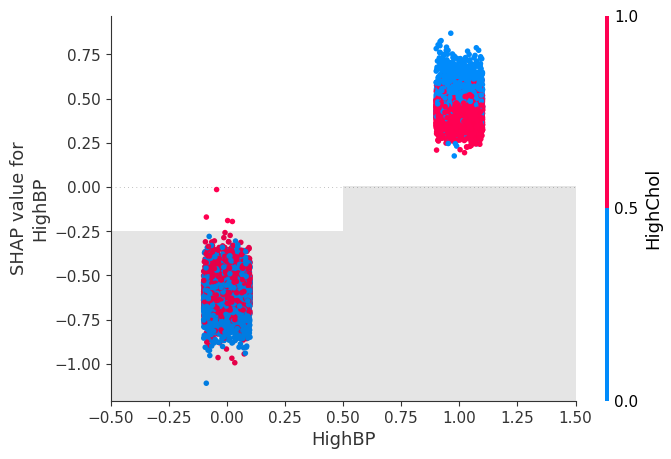

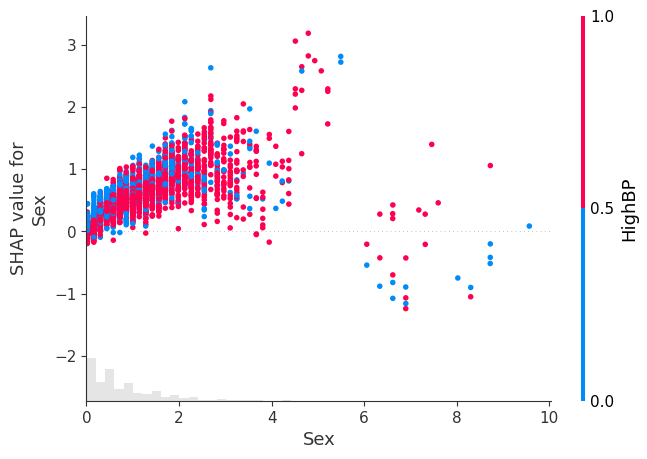

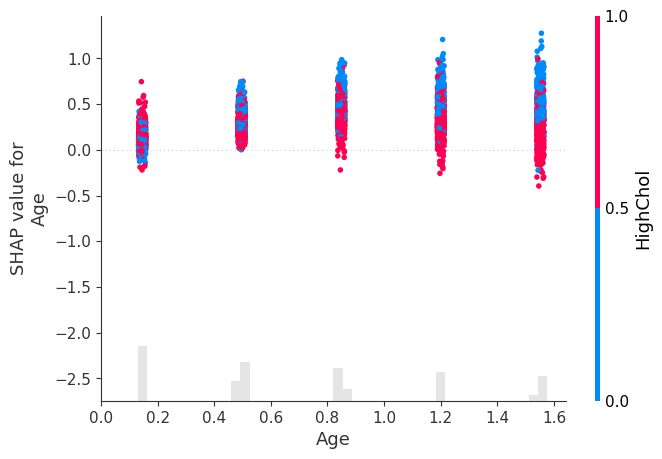

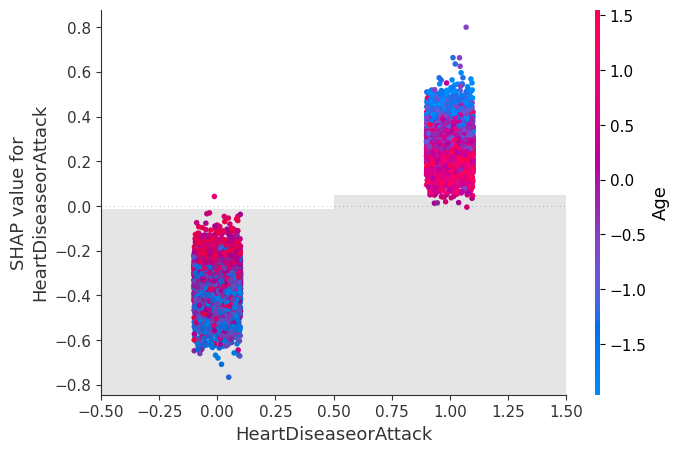

In [21]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

for name in feature_importance_names[:5]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name],
                       color=shap_values, xmin=0)


### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

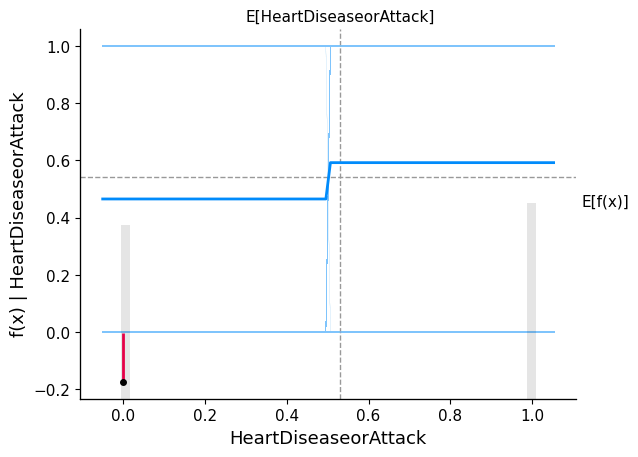

In [23]:
X1000 = shap.utils.sample(X_new, 1000)

sample_ind = 20
shap.partial_dependence_plot(
    'HeartDiseaseorAttack', clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

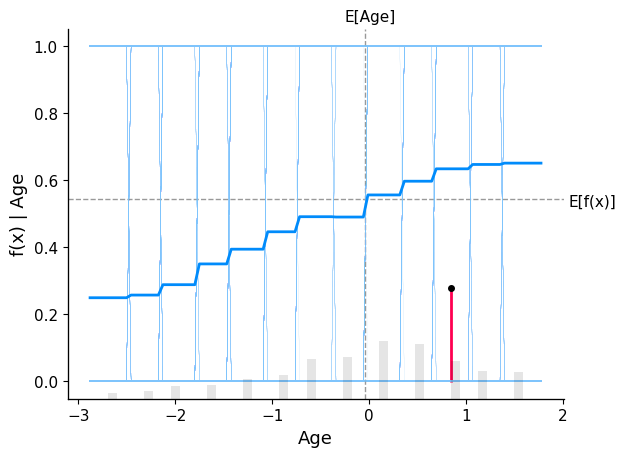

In [24]:

sample_ind = 20
shap.partial_dependence_plot(
    'Age', clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

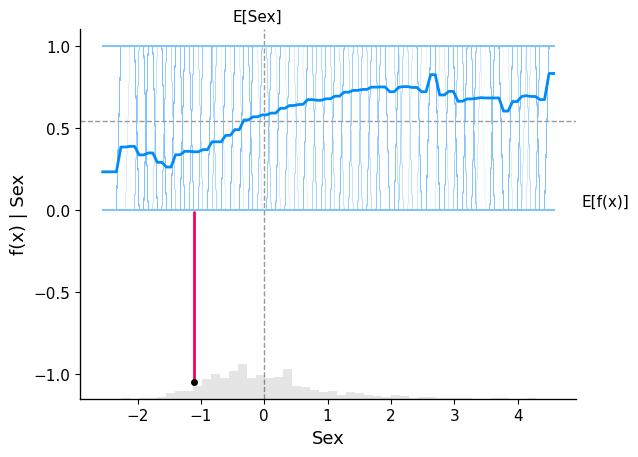

In [25]:

sample_ind = 20
shap.partial_dependence_plot(
    'Sex', clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

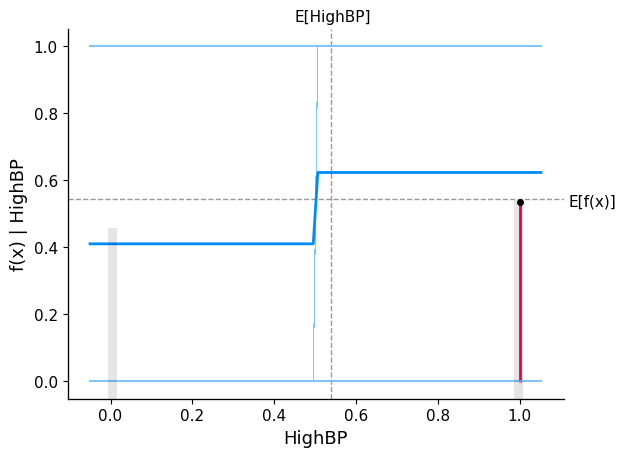

In [26]:

sample_ind = 20
shap.partial_dependence_plot(
    'HighBP', clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

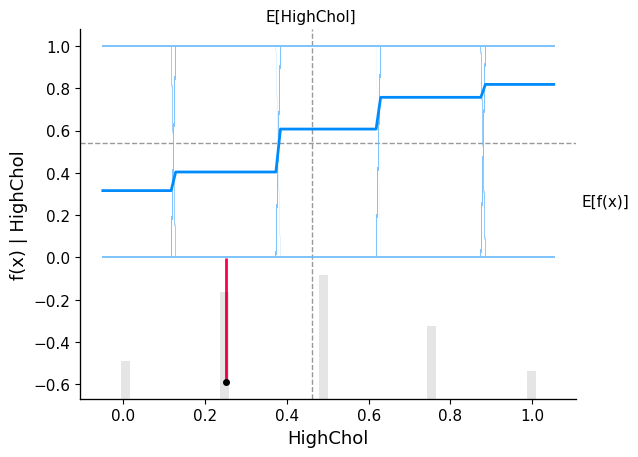

In [28]:

sample_ind = 20
shap.partial_dependence_plot(
    'HighChol', clf.predict, X1000, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [29]:
!pip install alibi

In [30]:
from alibi.explainers import AnchorTabular

In [ ]:
predict_fn = lambda x: clf.predict(x)
class_names = ["no_diabetico", "diabetico"]

explainer = AnchorTabular(predict_fn, clf.feature_names_in_, seed=1)
explainer.fit(X_new.to_numpy())


idx = 1000
# explicar predicción idx 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_new.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-1c7aecf2bb12>", line 4, in <cell line: 4>
    explainer = AnchorTabular(predict_fn, clf.feature_names_in_, seed=1)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1231, in feature_names_in_
    raise AttributeError(
AttributeError: `feature_names_in_` is defined only when `X` has feature names that are all strings.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):


# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Cada modelo tiene su ventaja:
- Los metodos de permutacion son utiles cuando se busa implementar una solucion sencilla y que pueda proporcionar una estimacion directa de la importancia de las caracterisitcas.
- Shap values proporcionan una vision mas detallada y granular de la importancia de las caracteristias, lo que puede ayuda a comprende rmejor las relaciones entre las caracterisitcas y predicciones.
- Anchors pueden ayudar a identificar los patrones mas importantes en los datos y proporcionar una justificacion intuitica de por que se clasifica una muestra especificamente.

Por lo tanto, los mas utiles depende de que valore mas el doctor Simi, o puede beneficiarse de ambos de igual manera:
Los metodos agnosticos locales son utiles si el doctor necesita comprender la logica detras de una prediccion particular, como si quisiera atender a un paciente en especifico. Mientras que los metodos agnostico globales le pueden servir al doctor si su objetivo es comprender las caracteristicas influyentes para la diabetes en general para consientizar a sus pacientes o entregar recomendaciones generales sin entrar en el detalle historico de cada cliente particular.



# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>